In [215]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [216]:
data = []
for folder in os.listdir('output'):
    if folder not in ('.DS_Store', 'unknown', 'dot', 'colon', 'semicolon'):
        for f in os.listdir(f'output/{folder}'):
            if f.endswith('.jpg'):
                image = Image.open(f'output/{folder}/{f}')
                data.append([f[0], np.array(image)])

    elif folder in ('dot', 'colon', 'semicolon'):
        for f in os.listdir(f'output/{folder}'):
            if f.endswith('.jpg'):
                image = Image.open(f'output/{folder}/{f}')
                r = re.compile("([a-zA-Z]+)([0-9]+)")
                m = r.match(f)
                data.append([m.group(1), np.array(image)])
           

In [237]:
X = [x[1] for x in data]
y = [x[0] for x in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
y_train, y_test = np.array(y_train), np.array(y_test)
print(len(X_train), len(X_test), len(y_train), len(y_test))
print(X_train[0].shape)

713 179 713 179
(30, 30)


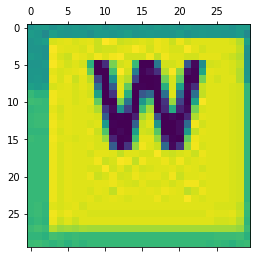

In [238]:
plt.matshow(X_train[11])

In [239]:
X_train[0].shape


(30, 30)

In [240]:
X_train, X_test = np.array(X_train), np.array(X_test)
X_train.shape

(713, 30, 30)

In [241]:
X_train = X_train / 255
X_test = X_test / 255

In [242]:
X_train_flat, X_test_flat = X_train.reshape(len(X_train), 30*30), X_test.reshape(len(X_test), 30*30)
print(X_train_flat.shape, X_test_flat.shape)

(713, 900) (179, 900)


In [243]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z', 26:'colon', 27:'dot', 28:'semi'}
res = dict((v,k) for k,v in word_dict.items())
y_train_num, y_test_num = np.array([res[x] for x in y_train]), np.array([res[x] for x in y_test])
y_test_num

array([ 8, 14,  8, 26, 28, 24, 24, 25,  8, 19,  4,  5, 18, 28,  1, 24, 17,
       13, 27,  0, 16, 15, 26,  9, 28, 14, 20, 28, 17,  4, 27, 16, 28, 12,
        2, 28, 16, 15, 15,  6, 24, 27, 26,  5, 23,  3, 16,  1,  9, 11, 21,
        2,  4, 23, 21, 19, 23,  4,  2,  8, 19, 27, 26,  9,  2,  1, 15,  6,
       24,  5,  2, 17, 19, 19, 26, 17, 16, 16,  2,  2,  6, 10, 28, 26, 23,
        4, 12, 12, 19, 12,  8, 23, 10, 26, 28, 22, 23,  8,  2, 26, 16,  5,
        8, 12, 23, 17,  7, 26, 18, 28,  2, 11, 26, 14,  4,  8, 22, 28,  8,
       12, 18, 16,  2,  8, 23, 12, 24, 12, 10, 26,  9,  5, 28,  0, 20, 12,
       28,  2, 14, 16, 15, 15, 20, 26, 26, 25,  2, 27,  3, 26,  6, 10,  0,
       14, 13,  8,  5, 11, 13,  8,  0, 27, 26,  3, 23, 18, 21, 14,  2, 27,
        5,  2,  3, 23, 27, 26, 23,  1, 10])

In [244]:
model = Sequential([
    Dense(29, input_shape=(900,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train_num, epochs=250)

Epoch 1/250
23/23 [==============================] - 0s 1ms/step - loss: 3.2717 - accuracy: 0.0898
Epoch 2/250
23/23 [==============================] - 0s 1ms/step - loss: 3.0506 - accuracy: 0.1851
Epoch 3/250
23/23 [==============================] - 0s 1ms/step - loss: 2.8868 - accuracy: 0.2482
Epoch 4/250
23/23 [==============================] - 0s 1ms/step - loss: 2.7394 - accuracy: 0.3029
Epoch 5/250
23/23 [==============================] - 0s 1ms/step - loss: 2.6047 - accuracy: 0.3969
Epoch 6/250
23/23 [==============================] - 0s 963us/step - loss: 2.4827 - accuracy: 0.3745
Epoch 7/250
23/23 [==============================] - 0s 991us/step - loss: 2.3613 - accuracy: 0.4460
Epoch 8/250
23/23 [==============================] - 0s 1000us/step - loss: 2.2654 - accuracy: 0.5231
Epoch 9/250
23/23 [==============================] - 0s 1ms/step - loss: 2.1737 - accuracy: 0.4993
Epoch 10/250
23/23 [==============================] - 0s 1ms/step - loss: 2.0873 - accuracy: 0.5344
Ep

In [245]:
model.evaluate(X_test_flat, y_test_num)

6/6 [==============================] - 0s 981us/step - loss: 0.6401 - accuracy: 0.9050


[0.6400749087333679, 0.9050279259681702]

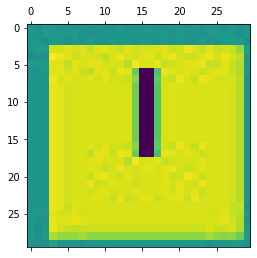

In [246]:
plt.matshow(X_test[0])

In [247]:
pred = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in pred]


In [248]:
cm = tf.math.confusion_matrix(labels=y_test_num, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

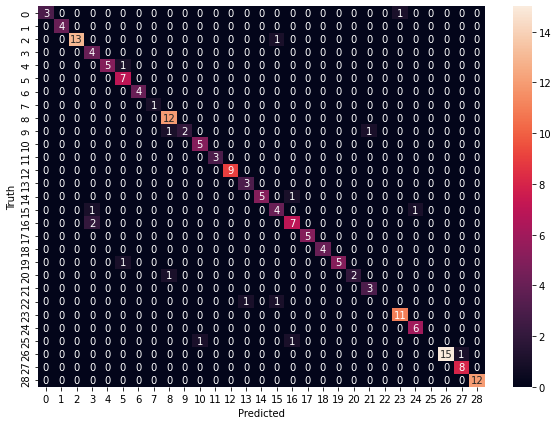

In [249]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [250]:
model = Sequential([
    Dense(250, input_shape=(900,), activation='relu'),
    Dense(500, input_shape=(900,), activation='relu'),
    Dense(29, activation='sigmoid')
])

model.compile(optimizer='Nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_flat, y_train_num, epochs=100)


Epoch 1/100
23/23 [==============================] - 1s 3ms/step - loss: 3.2283 - accuracy: 0.0813
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 2.8758 - accuracy: 0.1992
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 2.4618 - accuracy: 0.2819
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 2.0540 - accuracy: 0.3983
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 1.7450 - accuracy: 0.5147
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 1.5316 - accuracy: 0.5302
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 1.3107 - accuracy: 0.6059
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 1.1669 - accuracy: 0.6381
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 1.0604 - accuracy: 0.6830
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.9820 - accuracy: 0.7097
Epoch 11/

In [251]:
model.evaluate(X_test_flat, y_test_num)

6/6 [==============================] - 0s 1ms/step - loss: 0.7440 - accuracy: 0.9330


[0.7439613342285156, 0.9329608678817749]

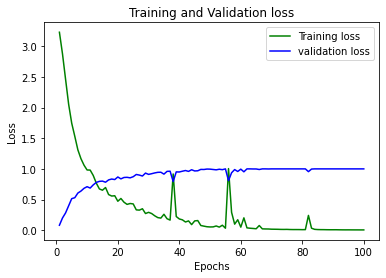

In [252]:
history.history.keys()
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, acc, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Text(69.0, 0.5, 'Truth')

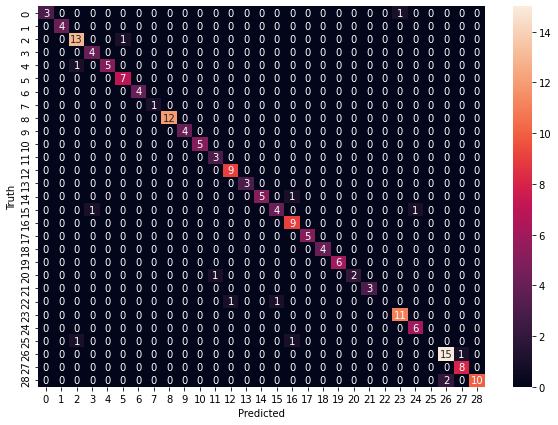

In [253]:
pred = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in pred]
cm = tf.math.confusion_matrix(labels=y_test_num, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model.summary()
model.save(r'model_Nadam.h5')